In [1]:
import pandas, numpy
import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.Extracellular_compiled.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file, header = 1)
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Na+,Cl-,Glucose,Lactate,Glutamine,...,Aspartic ac,MS Glutamin,MS Glutamic ac,Ornithine,Lysine,Citrulline,Glycin NL,XLeu/Ile/Hopro,Methylhistidin,Phenylalanine
0,NaN,NaN,NaN,NaN,NaN,mM,mM,uM,uM,uM,...,uM,uM,uM,uM,uM,uM,uM,uM,uM,uM
1,1,2,0.0,0.0,480000,121,111,5800,300,2061.07033855966,...,100.16,1422.455,1577.685,31.58,1509.19,3.705,633.275,842.7,2.165,156.8
2,2,2,0.5,0.0,480000,120,110,5900,400,13548.1023587988,...,114.53,1576.49,1738.505,34.935,1673.355,4.86,737.03,929.685,2.04,171.59
3,3,2,5.0,0.0,480000,121,111,5900,300,1379.5430799426,...,104.79,1597.895,1618.63,31.085,1770.46,4.49,746.875,926.1,2.375,166.795
4,4,2,50.0,0.0,480000,120,112,6200,700,1459.60347346998,...,103.17,1624.73,1547.505,29.82,1858.57,4.695,691.83,871.235,1.72,160.115


# 2. format data

## 2.1. select appropriate columns

In [4]:
selected_columns = [0, 1, 2, 3, 4] + [7, 8, 11]

df = df.iloc[:, selected_columns]
df

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Glucose,Lactate,Pyruvate
0,NaN,NaN,NaN,NaN,NaN,uM,uM,uM
1,1,2,0.0,0.0,480000,5800,300,-
2,2,2,0.5,0.0,480000,5900,400,-
3,3,2,5.0,0.0,480000,5900,300,-
4,4,2,50.0,0.0,480000,6200,700,-
...,...,...,...,...,...,...,...,...
168,100um-4.3,EC024,50.0,4.0,2100000,4400,1300,NaN
169,100um-24.1,EC024,50.0,24.0,2100000,3200,4900,NaN
170,100um-24.2,EC024,50.0,24.0,2100000,3300,4600,NaN
171,100um-24.3,EC024,50.0,24.0,2100000,3400,4500,NaN


## 2.1. select appropriate rows

In [5]:
df.drop([0], inplace=True)
df.drop(list(range(141, 171+1)), inplace=True)

In [6]:
wdf = df[df['Cell numbers'].str.isnumeric() == True]
wdf['Cell numbers'] = wdf['Cell numbers'].astype(float)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
wdf['Glucose'][wdf['Glucose'] == '-'] = float('nan')
wdf['Lactate'][wdf['Lactate'] == '-'] = float('nan')
wdf['Pyruvate'][wdf['Pyruvate'] == '-'] = float('nan')

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/adrian/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [8]:
wdf['Glucose'] = wdf['Glucose'].astype(float)
wdf['Lactate'] = wdf['Lactate'].astype(float)
wdf['Pyruvate'] = wdf['Pyruvate'].astype(float)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [9]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(wdf)

    Sample ID  Experiment  Treatment  Timepoint (h)  Cell numbers  Glucose  \
1            1          2        0.0            0.0      480000.0   5800.0   
2            2          2        0.5            0.0      480000.0   5900.0   
3            3          2        5.0            0.0      480000.0   5900.0   
4            4          2       50.0            0.0      480000.0   6200.0   
5            5          2        0.0            4.0      560000.0   4700.0   
6            6          2        0.0            4.0      560000.0   4600.0   
7            7          2        0.0            4.0      560000.0   4900.0   
8            8          2        0.5            4.0      510000.0   4900.0   
9            9          2        0.5            4.0      510000.0   4800.0   
10          10          2        0.5            4.0      510000.0   4600.0   
11          11          2        5.0            4.0      380000.0   5100.0   
12          12          2        5.0            4.0      380000.

# 3. plot

## 3.1. normalized by cell number

Glucose
4 significant 12108.591163738223 18023.22000492732 0.03944556144727296


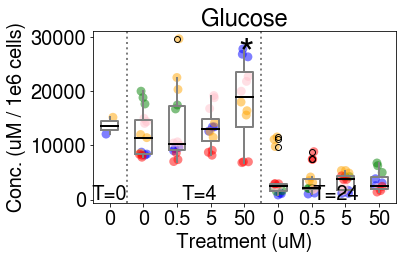

Lactate


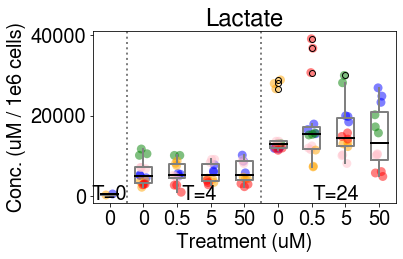

Pyruvate
4 very significant 2080.7872224487924 983.3015778118147 0.0025374340489701264
7 significant 694.2273919169243 263.4977927838891 0.046347901278906284
8 significant 694.2273919169243 47.91151564726274 0.014092901073953692


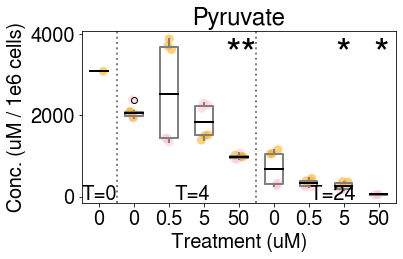

In [10]:
for metab in wdf.columns[5:]:
    
    print(metab)
    
    loc_zero_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)][metab].astype(float).values
    loc_four_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_half = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_five = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_fifty = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_twentyfour_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_half = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_five = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_fifty = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    
    cf1 = 1e6/wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)]['Cell numbers'].astype(float).values
    cf2 = 1e6/wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf3 = 1e6/wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf4 = 1e6/wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf5 = 1e6/wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf6 = 1e6/wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    cf7 = 1e6/wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    cf8 = 1e6/wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    cf9 = 1e6/wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    
    
    quant = [loc_zero_zero*cf1, loc_four_zero*cf2, loc_four_half*cf3, loc_four_five*cf4, loc_four_fifty*cf5, loc_twentyfour_zero*cf6, loc_twentyfour_half*cf7, loc_twentyfour_five*cf8, loc_twentyfour_fifty*cf9]
    
   # experimental labels
    loc_zero_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)]['Experiment'].astype(float).values
    loc_four_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_half_exp = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_five_exp = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_fifty_exp = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_twentyfour_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_half_exp = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_five_exp = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_fifty_exp = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    
    experiments = [loc_zero_zero_exp, loc_four_zero_exp, loc_four_half_exp, loc_four_five_exp, loc_four_fifty_exp, loc_twentyfour_zero_exp, loc_twentyfour_half_exp, loc_twentyfour_five_exp, loc_twentyfour_fifty_exp]
    
    ###
    ### boxplots
    ####
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    filtered = [element[~numpy.isnan(element)] for element in quant]
    matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    
    ###
    ### statistics
    ###
        
    for pos in [2, 3, 4]:
        #print(filtered[1], numpy.mean(filtered[1]))
        #print(filtered[pos], numpy.mean(filtered[pos]))
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[1], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    for pos in [6, 7, 8]:
        #print(filtered[5], numpy.mean(filtered[5]))
        #print(filtered[pos], numpy.mean(filtered[pos]))
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[5], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    ###
    ### scatter plots
    ###
    
    x=[]; y=[]; exp_colors=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
            the_color = None
            if experiments[i][j] == 2:
                the_color = 'blue'
            elif experiments[i][j] == 3:
                the_color = 'green'
            elif experiments[i][j] == 5:
                the_color = 'pink'
            elif experiments[i][j] == 6:
                the_color = 'orange'
            elif experiments[i][j] == 7:
                the_color = 'red'
            else:
                print(experiments[i][j])
                raise ValueError('no color map found')
            exp_colors.append(the_color)
            
    matplotlib.pyplot.scatter(x, y, s=80, c=exp_colors, alpha=1/2, linewidths=0)
    
    matplotlib.pyplot.axvline(1.5, alpha=0.5, lw=2, color='black', ls=':')
    matplotlib.pyplot.axvline(5.5, alpha=0.5, lw=2, color='black', ls=':')
    
    matplotlib.pyplot.text(0.055, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.35, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Conc. (uM / 1e6 cells)')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0', '0', '0.5', '5', '50', '0', '0.5', '5', '50'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

## 3.2. face-value measurements, not normalized by cell numbers

Glucose
3 significant 4473.333333333333 4775.0 0.03848559438128231


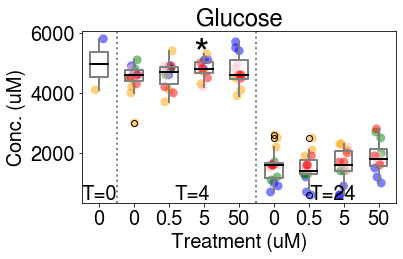

Lactate
4 significant 2140.0 1658.3333333333333 0.025304171801438978


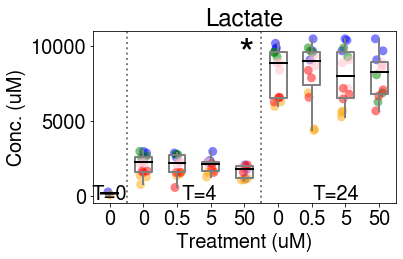

Pyruvate
3 very significant 696.4580373541361 555.1369154844446 0.0025374340489701264
4 very significant 696.4580373541361 231.25401872218436 0.0025374340489701264
7 significant 219.96504871828668 157.546510776734 0.010120285288538741
8 significant 219.96504871828668 40.2456731437007 0.014092901073953692


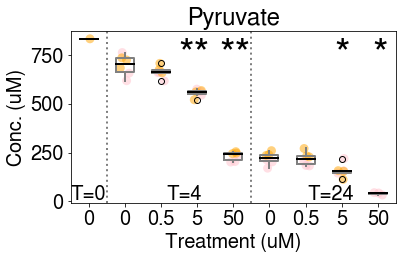

In [11]:
for metab in wdf.columns[5:]:
    
    print(metab)
    
    loc_zero_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)][metab].astype(float).values
    loc_four_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_half = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_five = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_fifty = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_twentyfour_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_half = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_five = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_fifty = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    
    quant = [loc_zero_zero, loc_four_zero, loc_four_half, loc_four_five, loc_four_fifty, loc_twentyfour_zero, loc_twentyfour_half, loc_twentyfour_five, loc_twentyfour_fifty]
    
   # experimental labels
    loc_zero_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)]['Experiment'].astype(float).values
    loc_four_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_half_exp = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_five_exp = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_fifty_exp = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_twentyfour_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_half_exp = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_five_exp = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_fifty_exp = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    
    experiments = [loc_zero_zero_exp, loc_four_zero_exp, loc_four_half_exp, loc_four_five_exp, loc_four_fifty_exp, loc_twentyfour_zero_exp, loc_twentyfour_half_exp, loc_twentyfour_five_exp, loc_twentyfour_fifty_exp]
    
    ###
    ### boxplots
    ####
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    filtered = [element[~numpy.isnan(element)] for element in quant]
    matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    
    ###
    ### statistics
    ###
        
    for pos in [2, 3, 4]:
        #print(filtered[1], numpy.mean(filtered[1]))
        #print(filtered[pos], numpy.mean(filtered[pos]))
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[1], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    for pos in [6, 7, 8]:
        #print(filtered[5], numpy.mean(filtered[5]))
        #print(filtered[pos], numpy.mean(filtered[pos]))
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[5], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    ###
    ### scatter plots
    ###
    
    x=[]; y=[]; exp_colors=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
            the_color = None
            if experiments[i][j] == 2:
                the_color = 'blue'
            elif experiments[i][j] == 3:
                the_color = 'green'
            elif experiments[i][j] == 5:
                the_color = 'pink'
            elif experiments[i][j] == 6:
                the_color = 'orange'
            elif experiments[i][j] == 7:
                the_color = 'red'
            else:
                print(experiments[i][j])
                raise ValueError('no color map found')
            exp_colors.append(the_color)
            
    matplotlib.pyplot.scatter(x, y, s=80, c=exp_colors, alpha=1/2, linewidths=0)
    
    matplotlib.pyplot.axvline(1.5, alpha=0.5, lw=2, color='black', ls=':')
    matplotlib.pyplot.axvline(5.5, alpha=0.5, lw=2, color='black', ls=':')
    
    matplotlib.pyplot.text(0.055, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.35, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Conc. (uM)')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0', '0', '0.5', '5', '50', '0', '0.5', '5', '50'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()